## TensorFlow intro

###### Minimal example with TensorFlow

###### Import the relevant libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

## Data generation

In [10]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

# Store the data in `.npz` format
np.savez(os.path.join(os.path.pardir, 'data', 'raw', 'TF_intro'), inputs=generated_inputs, targets=generated_targets)


## Solving with TensorFlow

In [15]:
# Load the data
training_data = np.load(os.path.join(os.path.pardir, 'data', 'raw', 'TF_intro.npz'))

In [14]:
training_data

In [34]:
# we'll create two variables that measure the size of our inputs and outputs the input sizes too
# as there are two input variables the Xs and the Zs we saw earlier
# the output size is 1 as there is only one output `y`.
input_size = 2
output_size = 1

# Unlike other packages where we have built in models when we are employing tensor flow we must actually build the model
# let's build our model and store it in a variable called `model`. It will be equal to  tf.keras.Sequential()
# tf.keras.Sequential() specifies how the model will be laid down (stack layers)
# the algorithm we're building has a simple structure.
# It takes inputs applies a single linear transformation and provides outputs.
# These linear combinations together with the outputs constitute the so-called output layer.
# tf.keras.layers.Dense() method takes the provided inputs and calculates the dot product of the inputs
# and weights and adds the bias. output = np.dot(inputs, weights) + bias

# According to our theoretical framework we need:
#     1. data
#     2. model
#     3. an objective function and,
#     4. an optimization algorithm.

# In fact if we want to make this example as close to the original as possible we can set a random uniform
# initialized or where we defined the layer instead of having a single argument output size.
# We can also add a kernel initialize our and a bias initialize here. Kernel here is the broader term for weight
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(
                                                     minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(
                                                     minval=-0.1, maxval=0.1)
                                                 )
                            ])


# We've taken care of the data and the model and are left with the latter two. The method which allows us
# to specify them is called compile(). we include several different arguments.
# The optimizer or the optimization algorithm we will use is abbreviated as SGD. SGD stands for 
# stochastic gradient descent and is a generalization of the gradient descent concept.
# The second argument will include is the `loss function`.
# So we are going to use the L2-Norm loss scale by the number of observations.
# The L2-Norm loss is also known as the least sum of squares.
# Scaling by the number of observations is equivalent to finding an average or a mean
# Hence for our loss, we are going to use 'mean_squared_error'

# model.compile(optimizer='sgd', loss='mean_squared_error')


# The learning rate is an integral part of the optimizer.
# Here we took the default stochastic gradient descent or  SGD.
# In fact we can create our own custom optimizer and specify several arguments.

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')


# To train the model we must specify the inputs that are contained in the inputs tensor from the variable 
# training data and the targets which are contained in the `targets` tensor from training data.
# We set the number of iterations in this method too.
# Each iteration over the full data set in machine learning is called an epoch.

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
1000/1000 - 0s - loss: 22.0788
Epoch 2/100
1000/1000 - 0s - loss: 1.1889
Epoch 3/100
1000/1000 - 0s - loss: 0.4417
Epoch 4/100
1000/1000 - 0s - loss: 0.3859
Epoch 5/100
1000/1000 - 0s - loss: 0.4031
Epoch 6/100
1000/1000 - 0s - loss: 0.3698
Epoch 7/100
1000/1000 - 0s - loss: 0.3782
Epoch 8/100
1000/1000 - 0s - loss: 0.3712
Epoch 9/100
1000/1000 - 0s - loss: 0.3614
Epoch 10/100
1000/1000 - 0s - loss: 0.3476
Epoch 11/100
1000/1000 - 0s - loss: 0.3988
Epoch 12/100
1000/1000 - 0s - loss: 0.3829
Epoch 13/100
1000/1000 - 0s - loss: 0.4411
Epoch 14/100
1000/1000 - 0s - loss: 0.3720
Epoch 15/100
1000/1000 - 0s - loss: 0.3810
Epoch 16/100
1000/1000 - 0s - loss: 0.3653
Epoch 17/100
1000/1000 - 0s - loss: 0.3727
Epoch 18/100
1000/1000 - 0s - loss: 0.3609
Epoch 19/100
1000/1000 - 0s - loss: 0.3782
Epoch 20/100
1000/1000 - 0s - loss: 0.3587
Epoch 21/100
1000/1000 - 0s - loss: 0.3788
Epoch 22/100
1000/1000 - 0s - loss: 0.3698
Epoch 23/100
1000/1000 - 0s - loss: 0.4341
Epoch 24/100
1000/1

##### Extract the weights and bias

In [35]:
model.layers[0].get_weights()

[array([[ 2.0299354],
        [-3.0394716]], dtype=float32), array([5.0018077], dtype=float32)]

In [36]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0299354],
       [-3.0394716]], dtype=float32)

In [37]:
bias = model.layers[0].get_weights()[1]
bias

array([5.0018077], dtype=float32)

##### Extract the outputs (make predictions)

In [38]:
# If we wanted to predict values using our model, we use the method predict_on_batch()
# the batch here is the data that we provided with.
# The result comprises an array with a corresponding outputs for each of the inputs.
model.predict_on_batch(training_data['inputs']).round(1)

array([[-11.7],
       [ -1.6],
       [ 23.9],
       [ 34.2],
       [ 13.1],
       [-24.4],
       [ -5.4],
       [  8. ],
       [ 13.4],
       [ 48.1],
       [ 19.9],
       [ 23.6],
       [ 22. ],
       [  0.4],
       [ 40.1],
       [ 21. ],
       [-23.2],
       [ 13.7],
       [  1.8],
       [ 10.5],
       [  3.4],
       [ 14.9],
       [ -3.6],
       [ 53.1],
       [ 19.6],
       [-28.1],
       [ 13.4],
       [-20.2],
       [-11. ],
       [ 17.3],
       [-10.6],
       [ 18.5],
       [ 45.4],
       [-37.6],
       [-19.3],
       [ 24. ],
       [ 45.3],
       [ 31.8],
       [ 29.5],
       [ 30.1],
       [ 23.1],
       [ 11.8],
       [ 34. ],
       [ -0.8],
       [ 27.2],
       [ 35.2],
       [ 19.7],
       [  6.4],
       [  3.5],
       [ 23. ],
       [  8.4],
       [  2.7],
       [-19.1],
       [ 16.9],
       [-19.7],
       [ 35.9],
       [ 17.4],
       [ 29. ],
       [ 16.3],
       [  3.2],
       [ 38. ],
       [  2.2],
       [

In [39]:
# What we see is that the outputs and the targets are very close to each other but not exactly the same.
training_data['targets'].round(1)

array([[-11.5],
       [ -2.1],
       [ 23.4],
       [ 34.6],
       [ 12.8],
       [-24. ],
       [ -5.9],
       [  8.3],
       [ 13.9],
       [ 47.7],
       [ 20.6],
       [ 23. ],
       [ 22.7],
       [  0.7],
       [ 39.6],
       [ 21. ],
       [-23.1],
       [ 12.9],
       [  1.5],
       [ 11. ],
       [  3. ],
       [ 14.9],
       [ -3.3],
       [ 51.9],
       [ 18.4],
       [-26.8],
       [ 12.5],
       [-19. ],
       [-10.9],
       [ 18. ],
       [-10. ],
       [ 19.2],
       [ 43.9],
       [-36.3],
       [-19.4],
       [ 23.8],
       [ 44.5],
       [ 32.3],
       [ 29.4],
       [ 29.9],
       [ 23.2],
       [ 11.4],
       [ 33.9],
       [ -1.5],
       [ 26.8],
       [ 35.5],
       [ 18.7],
       [  6.2],
       [  3.8],
       [ 23.4],
       [  8.7],
       [  3.5],
       [-18. ],
       [ 16.8],
       [-19.3],
       [ 36.1],
       [ 18. ],
       [ 29.4],
       [ 16.1],
       [  2.6],
       [ 38.1],
       [  2.8],
       [

##### Plotting the data

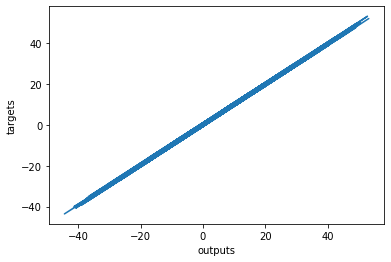

In [40]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()